## Importing necessary libraries

In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings("ignore")

## Reading excel file to dataframe

In [178]:
df=pd.read_excel('.\ACCS Case Study Data.xlsx')
df

,Order Date,Ship Date,Customer Name,State,Category,Segment,Sub-Category,Sales,Quantity,Discount,Profit
0,2012-01-01,2012-01-06,Toby Braunhardt,Rajasthan,Office Supplies,Consumer,Storage,408.300,2,0.0,106.140
1,2012-01-01,2012-01-08,Joseph Holt,Uttar Pradesh,Office Supplies,Consumer,Supplies,120.366,3,0.1,36.036
2,2012-01-01,2012-01-05,Annie Thurman,Haryana,Office Supplies,Consumer,Storage,66.120,4,0.0,29.640
3,2012-01-01,2012-01-05,Eugene Moren,Punjab,Office Supplies,Home Office,Paper,44.865,3,0.5,-26.055
4,2012-01-01,2012-01-08,Joseph Holt,Uttar Pradesh,Furniture,Consumer,Furnishings,113.670,5,0.1,37.770
...,...,...,...,...,...,...,...,...,...,...,...
51285,2015-12-31,2016-01-05,Liz Preis,Kerala,Office Supplies,Consumer,Binders,3.990,1,0.0,0.420
51286,2015-12-31,2016-01-07,Kalyca Meade,Chandigarh,Office Supplies,Corporate,Paper,79.470,3,0.0,25.380
51287,2015-12-31,2016-01-02,Charlotte Melton,Gujarat,Office Supplies,Consumer,Labels,26.400,3,0.0,12.360
51288,2015-12-31,2016-01-04,Julia Barnett,Jammu and Kashmir,Office Supplies,Home Office,Labels,16.740,3,0.0,0.660


## Checking the datatypes

In [179]:
df.dtypes

Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Customer Name            object
State                    object
Category                 object
Segment                  object
Sub-Category             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

## Checking for null values

In [180]:
df.isnull().sum()

Order Date       0
Ship Date        0
Customer Name    0
State            0
Category         0
Segment          0
Sub-Category     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

## Renaming column names to have no spaces

In [181]:
df.rename(columns={'Order Date':'Order_Date','Ship Date':'Ship_Date','Customer Name':'Customer_Name'},inplace=True)

In [182]:
df

,Order_Date,Ship_Date,Customer_Name,State,Category,Segment,Sub-Category,Sales,Quantity,Discount,Profit
0,2012-01-01,2012-01-06,Toby Braunhardt,Rajasthan,Office Supplies,Consumer,Storage,408.300,2,0.0,106.140
1,2012-01-01,2012-01-08,Joseph Holt,Uttar Pradesh,Office Supplies,Consumer,Supplies,120.366,3,0.1,36.036
2,2012-01-01,2012-01-05,Annie Thurman,Haryana,Office Supplies,Consumer,Storage,66.120,4,0.0,29.640
3,2012-01-01,2012-01-05,Eugene Moren,Punjab,Office Supplies,Home Office,Paper,44.865,3,0.5,-26.055
4,2012-01-01,2012-01-08,Joseph Holt,Uttar Pradesh,Furniture,Consumer,Furnishings,113.670,5,0.1,37.770
...,...,...,...,...,...,...,...,...,...,...,...
51285,2015-12-31,2016-01-05,Liz Preis,Kerala,Office Supplies,Consumer,Binders,3.990,1,0.0,0.420
51286,2015-12-31,2016-01-07,Kalyca Meade,Chandigarh,Office Supplies,Corporate,Paper,79.470,3,0.0,25.380
51287,2015-12-31,2016-01-02,Charlotte Melton,Gujarat,Office Supplies,Consumer,Labels,26.400,3,0.0,12.360
51288,2015-12-31,2016-01-04,Julia Barnett,Jammu and Kashmir,Office Supplies,Home Office,Labels,16.740,3,0.0,0.660


## Descriptive statistics of the dataframe

In [183]:
df.describe()

,Sales,Quantity,Discount,Profit
count,51290.000000,51290.000000,51290.000000,51290.000000
mean,246.490581,3.476545,0.142908,28.610982
std,487.565361,2.278766,0.212280,174.340972
min,0.444000,1.000000,0.000000,-6599.978000
25%,30.758625,2.000000,0.000000,0.000000
50%,85.053000,3.000000,0.000000,9.240000
75%,251.053200,5.000000,0.200000,36.810000
max,22638.480000,14.000000,0.850000,8399.976000


## Getting the maximum and minimum Order dates in the dataset

In [184]:
df.Order_Date.max()

Timestamp('2015-12-31 00:00:00')

In [185]:
df.Order_Date.min()

Timestamp('2012-01-01 00:00:00')

## Getting the number of Unique customers

In [187]:
len(df.Customer_Name.unique())

796

## Getting each customer's most recent Order Date

In [188]:
df2=df.groupby(['Customer_Name']).agg({'Order_Date':'max'})
df2

,Order_Date
Customer_Name,
Aaron Bergman,2015-12-15
Aaron Hawkins,2015-12-19
Aaron Smayling,2015-12-08
Adam Bellavance,2015-11-26
Adam Hart,2015-12-29
...,...
Xylona Preis,2015-11-18
Yana Sorensen,2015-12-27
Yoseph Carroll,2015-12-27


## Most recent Order was how many days ago

In [189]:
df2.Recency = (df2.Order_Date.max() - df2.Order_Date)
df2.Recency

Customer_Name
Aaron Bergman        16 days
Aaron Hawkins        12 days
Aaron Smayling       23 days
Adam Bellavance      35 days
Adam Hart             2 days
                       ...  
Xylona Preis         43 days
Yana Sorensen         4 days
Yoseph Carroll        4 days
Zuschuss Carroll      3 days
Zuschuss Donatelli    1 days
Name: Order_Date, Length: 796, dtype: timedelta64[ns]

## Finding the range of this Recency data

In [190]:
df2.Recency.max()-df2.Recency.min()

Timedelta('586 days 00:00:00')

## Converting the recency data to integers for plotting

In [191]:
df2.Recency = df2.Recency.dt.days

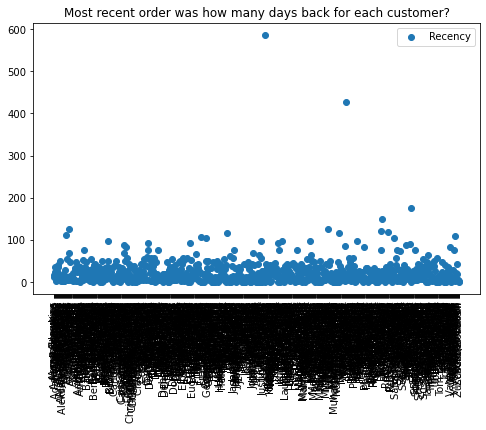

In [192]:
fig, ax = plt.subplots(figsize=(8,5))
plt.scatter(y=df2.Recency,x=df2.index)
plt.xticks(rotation=90)
plt.title("Most recent order was how many days back for each customer?")
plt.legend(["Recency"])
plt.show()

In [193]:
df2.Recency.skew()

8.500714809760893

In [194]:
df2.Recency.kurt()

120.10039427865705

## Insights: there are two Outliers here

In [195]:
df2.Recency = df2.Recency.max() - df2.Recency

In [196]:
df2.Recency

Customer_Name
Aaron Bergman         570
Aaron Hawkins         574
Aaron Smayling        563
Adam Bellavance       551
Adam Hart             584
                     ... 
Xylona Preis          543
Yana Sorensen         582
Yoseph Carroll        582
Zuschuss Carroll      583
Zuschuss Donatelli    585
Name: Order_Date, Length: 796, dtype: int64

## The recency score is generated by giving highest importance to most recent order. Once the recency data is sorted we can see that Kai Rey and Nicole Brennan are the Outliers. From the graph, we know these two customers have not placed any order in atleast 400 days in the past.

In [197]:
df2.Recency.sort_values()

Customer_Name
Kai Rey              0
Nicole Brennan     158
Shirley Jackson    411
Robert Barroso     436
Michelle Tran      459
                  ... 
Jim Kriz           586
Shirley Schmidt    586
Jill Matthias      586
Tracy Collins      586
Joseph Airdo       586
Name: Order_Date, Length: 796, dtype: int64

## Insights: Kai Rey has placed only 1 unique order from Assam and consolidated profit for this customer is -824.74976 (loss)

In [198]:
df[df.Customer_Name=='Kai Rey']

,Order_Date,Ship_Date,Customer_Name,State,Category,Segment,Sub-Category,Sales,Quantity,Discount,Profit
23578,2014-05-24,2014-05-31,Kai Rey,Assam,Technology,Home Office,Copiers,941.77824,8,0.402,-601.74176
23596,2014-05-24,2014-05-31,Kai Rey,Assam,Office Supplies,Home Office,Appliances,152.28000,5,0.400,-99.02000
23604,2014-05-24,2014-05-31,Kai Rey,Assam,Office Supplies,Home Office,Binders,141.28800,7,0.400,-73.05200
23610,2014-05-24,2014-05-31,Kai Rey,Assam,Technology,Home Office,Phones,114.81600,4,0.400,-49.82400
23624,2014-05-24,2014-05-31,Kai Rey,Assam,Office Supplies,Home Office,Art,10.41600,1,0.400,-0.70400
23626,2014-05-24,2014-05-31,Kai Rey,Assam,Office Supplies,Home Office,Art,19.27200,2,0.400,2.87200
23635,2014-05-24,2014-05-31,Kai Rey,Assam,Office Supplies,Home Office,Fasteners,21.84000,4,0.400,-3.28000


## Insights: Nicole Brennan has placed 17 unique orders from Madhya Pradesh and consolidated profit for this customer is -691.4278 (loss)

In [199]:
df[df.Customer_Name=='Nicole Brennan']

,Order_Date,Ship_Date,Customer_Name,State,Category,Segment,Sub-Category,Sales,Quantity,Discount,Profit
3304,2012-06-26,2012-06-28,Nicole Brennan,Madhya Pradesh,Office Supplies,Corporate,Art,99.8400,2,0.000,32.9400
4263,2012-08-11,2012-08-15,Nicole Brennan,Madhya Pradesh,Technology,Corporate,Machines,68.8920,1,0.600,-37.9080
4266,2012-08-11,2012-08-15,Nicole Brennan,Madhya Pradesh,Furniture,Corporate,Chairs,64.4880,1,0.600,-51.6120
5648,2012-09-25,2012-09-30,Nicole Brennan,Madhya Pradesh,Office Supplies,Corporate,Appliances,143.9520,3,0.200,14.3952
6415,2012-10-21,2012-10-25,Nicole Brennan,Madhya Pradesh,Furniture,Corporate,Furnishings,129.9200,4,0.000,10.3936
7681,2012-11-28,2012-12-04,Nicole Brennan,Madhya Pradesh,Furniture,Corporate,Furnishings,248.6880,8,0.400,32.9280
7689,2012-11-28,2012-12-04,Nicole Brennan,Madhya Pradesh,Technology,Corporate,Accessories,101.3040,4,0.400,-44.0160
7704,2012-11-28,2012-12-04,Nicole Brennan,Madhya Pradesh,Office Supplies,Corporate,Art,12.3840,2,0.400,-1.0560
8913,2012-12-28,2012-12-30,Nicole Brennan,Madhya Pradesh,Furniture,Corporate,Chairs,139.2960,6,0.200,41.7360
8923,2012-12-28,2012-12-30,Nicole Brennan,Madhya Pradesh,Office Supplies,Corporate,Binders,17.8400,2,0.000,3.0000


In [200]:
len(df[df.Customer_Name == 'Kai Rey'].Order_Date.unique())

1

In [201]:
len(df[df.Customer_Name == 'Nicole Brennan'].Order_Date.unique())

17

In [202]:
df3=df.groupby('Customer_Name').agg({'Profit':'sum'})
df3[df3.Profit<0]

,Profit
Customer_Name,
Alan Haines,-592.24612
Allen Rosenblatt,-552.28182
Anna Chung,-272.12732
Becky Martin,-1096.92540
Bobby Trafton,-469.79110
...,...
Tanja Norvell,-706.18216
Tracy Hopkins,-733.74750
Tracy Zic,-80.11550


In [203]:
df3.loc['Kai Rey']

Profit   -824.74976
Name: Kai Rey, dtype: float64

In [204]:
df3.loc['Nicole Brennan']

Profit   -691.4278
Name: Nicole Brennan, dtype: float64

## Hence, it is safe to remove these two Outliers as they are not our customers of interest

In [206]:
df =df[~df.Customer_Name.isin(['Kai Rey','Nicole Brennan'])]
df.shape

(51252, 11)

In [207]:
df2=df.groupby(['Customer_Name']).agg({'Order_Date':'max'})
df2

,Order_Date
Customer_Name,
Aaron Bergman,2015-12-15
Aaron Hawkins,2015-12-19
Aaron Smayling,2015-12-08
Adam Bellavance,2015-11-26
Adam Hart,2015-12-29
...,...
Xylona Preis,2015-11-18
Yana Sorensen,2015-12-27
Yoseph Carroll,2015-12-27


In [208]:
df2.Recency = (df2.Order_Date.max() - df2.Order_Date)
df2.Recency

Customer_Name
Aaron Bergman        16 days
Aaron Hawkins        12 days
Aaron Smayling       23 days
Adam Bellavance      35 days
Adam Hart             2 days
                       ...  
Xylona Preis         43 days
Yana Sorensen         4 days
Yoseph Carroll        4 days
Zuschuss Carroll      3 days
Zuschuss Donatelli    1 days
Name: Order_Date, Length: 794, dtype: timedelta64[ns]

In [209]:
df2.Recency.max()-df2.Recency.min()

Timedelta('175 days 00:00:00')

In [210]:
df2.Recency = df2.Recency.dt.days

## Now our Recency data is without any significant outliers

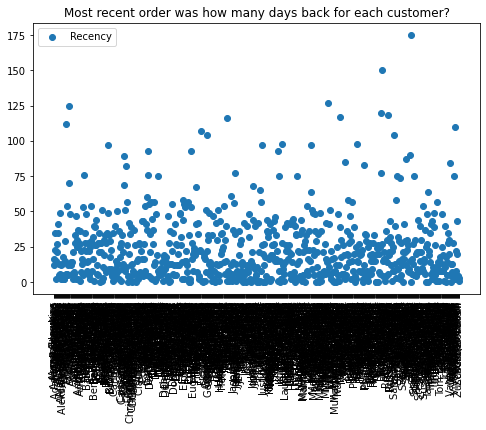

In [211]:
fig, ax = plt.subplots(figsize=(8,5))
plt.scatter(y=df2.Recency,x=df2.index)
plt.xticks(rotation=90)
plt.title("Most recent order was how many days back for each customer?")
plt.legend(["Recency"])
plt.show()

In [212]:
df2.Recency.skew()

2.074549515456696

In [213]:
df2.Recency.kurt()

6.100665959329103

In [214]:
df2.Recency = df2.Recency.max() - df2.Recency

## The recency score is generated with highest score to most recent customer

In [215]:
df2.Recency

Customer_Name
Aaron Bergman         159
Aaron Hawkins         163
Aaron Smayling        152
Adam Bellavance       140
Adam Hart             173
                     ... 
Xylona Preis          132
Yana Sorensen         171
Yoseph Carroll        171
Zuschuss Carroll      172
Zuschuss Donatelli    174
Name: Order_Date, Length: 794, dtype: int64

## The values are normalized on a scale of 0 to 100

In [216]:
df2.Recency = df2.Recency/df2.Recency.max() * 100
df2.Recency

Customer_Name
Aaron Bergman         90.857143
Aaron Hawkins         93.142857
Aaron Smayling        86.857143
Adam Bellavance       80.000000
Adam Hart             98.857143
                        ...    
Xylona Preis          75.428571
Yana Sorensen         97.714286
Yoseph Carroll        97.714286
Zuschuss Carroll      98.285714
Zuschuss Donatelli    99.428571
Name: Order_Date, Length: 794, dtype: float64

In [217]:
df2.insert(1,"Recency",df2.Recency,True)

In [218]:
df2.drop(columns='Order_Date',inplace=True)

In [219]:
df2

,Recency
Customer_Name,
Aaron Bergman,90.857143
Aaron Hawkins,93.142857
Aaron Smayling,86.857143
Adam Bellavance,80.000000
Adam Hart,98.857143
...,...
Xylona Preis,75.428571
Yana Sorensen,97.714286
Yoseph Carroll,97.714286


In [220]:
df2.Recency.min()

0.0

In [221]:
df2.Recency.max()

100.0

## Similarly Frequency for each customer is calculated as the number of Orders placed on unique dates. All orders placed on a single day by a customer is counted as 1

In [222]:
df2.insert(1,"Frequency",np.nan,True)
for name in df.Customer_Name.unique():
    df2.loc[name].Frequency = len(df[df.Customer_Name == name].Order_Date.unique())

In [223]:
df2

,Recency,Frequency
Customer_Name,,
Aaron Bergman,90.857143,37.0
Aaron Hawkins,93.142857,34.0
Aaron Smayling,86.857143,31.0
Adam Bellavance,80.000000,39.0
Adam Hart,98.857143,40.0
...,...,...
Xylona Preis,75.428571,30.0
Yana Sorensen,97.714286,31.0
Yoseph Carroll,97.714286,30.0


## The range of Frequency is from 15 to 46. That means all customers are repeat customers.

In [224]:
df2['Frequency'].min()

15.0

In [225]:
df2['Frequency'].max()

46.0

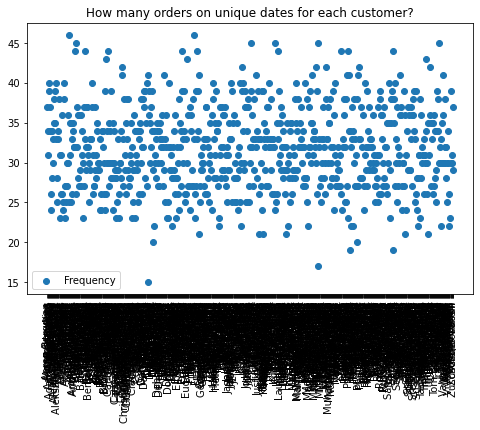

In [226]:
fig, ax = plt.subplots(figsize=(8,5))
plt.scatter(y=df2.Frequency,x=df2.index)
plt.xticks(rotation=90)
plt.title("How many orders on unique dates for each customer?")
plt.legend(["Frequency"])
plt.show()

In [227]:
df2.Frequency.skew()

0.15957993070858353

In [228]:
df2.Frequency.kurt()

-0.2366801579466693

## The Frequency score is normalized on a scale of 0 to 100

In [229]:
df2['Frequency'] = (df2['Frequency']-df2['Frequency'].min())/(df2['Frequency'].max()-df2['Frequency'].min()) * 100
df2

,Recency,Frequency
Customer_Name,,
Aaron Bergman,90.857143,70.967742
Aaron Hawkins,93.142857,61.290323
Aaron Smayling,86.857143,51.612903
Adam Bellavance,80.000000,77.419355
Adam Hart,98.857143,80.645161
...,...,...
Xylona Preis,75.428571,48.387097
Yana Sorensen,97.714286,51.612903
Yoseph Carroll,97.714286,48.387097


In [230]:
df2['Frequency'].min()

0.0

In [231]:
df2['Frequency'].max()

100.0

## The Monetary value for each customer is calculated as consolidated profit made on all orders of the customer

In [232]:
df2.insert(2,"Monetary_Value",np.nan,True)
for name in df.Customer_Name.unique():
    df2.loc[name].Monetary_Value = df[df.Customer_Name == name].Profit.sum()

In [233]:
df2['Monetary_Value'].max()

8672.898899999998

In [234]:
df2['Monetary_Value'].min()

-6151.558100000001

## The Monetary value data is plotted and it is normally distributed

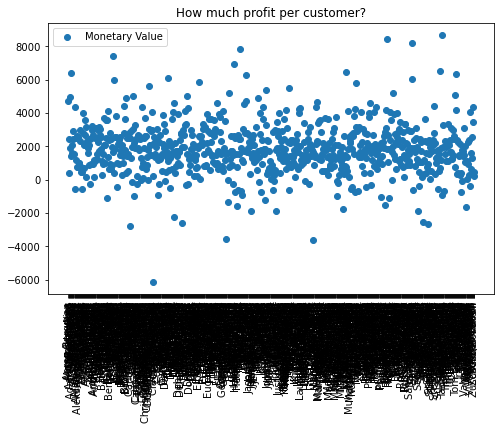

In [235]:
fig, ax = plt.subplots(figsize=(8,5))
plt.scatter(y=df2.Monetary_Value,x=df2.index)
plt.xticks(rotation=90)
plt.title("How much profit per customer?")
plt.legend(["Monetary Value"])
plt.show()

In [236]:
df2['Monetary_Value'].kurt()

2.9790657078478473

In [237]:
df2['Monetary_Value'].skew()

0.29200370584208946

## The Monetary value is normalized. However the minimum value is -70.928 and maximum is 100. Here -ve value respresents overall loss made on the customer's orders

In [238]:
df2['Monetary_Value'] = df2['Monetary_Value']/df2['Monetary_Value'].max() * 100
df2

,Recency,Frequency,Monetary_Value
Customer_Name,,,
Aaron Bergman,90.857143,70.967742,53.998185
Aaron Hawkins,93.142857,61.290323,28.259629
Aaron Smayling,86.857143,51.612903,4.256498
Adam Bellavance,80.000000,77.419355,57.419981
Adam Hart,98.857143,80.645161,21.930769
...,...,...,...
Xylona Preis,75.428571,48.387097,15.043674
Yana Sorensen,97.714286,51.612903,39.783772
Yoseph Carroll,97.714286,48.387097,50.123686


In [239]:
df2['Monetary_Value'].max()

100.0

In [240]:
df2['Monetary_Value'].min()

-70.92851157298746

## Based on the Recency, Frequency, and Monetary Value scores, an overall score for each customer is generated giving weightage 0.3, 0.3, and 0.4 to each component respectively. This is a business decision about how much weightage to be given to each component. We have given slightly more weightage to Monetary Value of the customer

In [241]:
df2.insert(3,"Overall_Score",np.nan,True)
for name in df.Customer_Name.unique():
    df2.loc[name].Overall_Score = (0.3*df2.loc[name].Recency) + (0.3*df2.loc[name].Frequency) + (0.4*df2.loc[name].Monetary_Value)

In [242]:
df2

,Recency,Frequency,Monetary_Value,Overall_Score
Customer_Name,,,,
Aaron Bergman,90.857143,70.967742,53.998185,70.146739
Aaron Hawkins,93.142857,61.290323,28.259629,57.633805
Aaron Smayling,86.857143,51.612903,4.256498,43.243613
Adam Bellavance,80.000000,77.419355,57.419981,70.193799
Adam Hart,98.857143,80.645161,21.930769,62.622999
...,...,...,...,...
Xylona Preis,75.428571,48.387097,15.043674,43.162170
Yana Sorensen,97.714286,51.612903,39.783772,60.711665
Yoseph Carroll,97.714286,48.387097,50.123686,63.879889


## The customers are sorted as per the overall score and top 15 most profitable customers are found

In [243]:
df2.sort_values(by="Overall_Score",ascending=False).head(15)

,Recency,Frequency,Monetary_Value,Overall_Score
Customer_Name,,,,
Harry Marie,99.428571,80.645161,80.230226,86.114210
Tamara Chand,84.571429,67.741935,100.000000,85.694009
Bill Eplett,80.000000,80.645161,85.438622,82.368997
Raymond Buch,88.571429,45.161290,97.465099,79.105855
Sanjit Engle,94.857143,74.193548,69.363012,78.460412
Jane Waco,93.142857,70.967742,72.246267,78.131687
Daniel Raglin,84.571429,80.645161,70.379846,77.716915
Christopher Conant,96.571429,74.193548,64.607391,77.072449
Patrick O'Donnell,100.000000,83.870968,53.247699,76.460370


## Based on low frequency and high recency values, the top 15 customers are filtered out. Even though 15 is the minimum frquency (which means these are repeat customers), these customers have made a recent purchase and place orders less frequently. So, these customers can be targetted with emails

In [244]:
df2.sort_values(by=["Frequency","Recency"],ascending=[True,False]).head(15)

,Recency,Frequency,Monetary_Value,Overall_Score
Customer_Name,,,,
Darren Budd,67.428571,0.000000,6.767805,22.935693
Michael Oakman,96.571429,6.451613,3.300610,32.227157
Sarah Bern,98.857143,12.903226,27.291449,44.444690
Paul Knutson,44.000000,12.903226,-3.556936,15.648193
Peter Bühler,100.000000,16.129032,22.324539,43.768525
David Bremer,97.142857,16.129032,-26.181518,23.508960
Kalyca Meade,100.000000,19.354839,4.260770,37.510760
Shirley Schmidt,100.000000,19.354839,4.800542,37.726668
Gary Mitchum,90.857143,19.354839,33.115875,46.309945


## Top 15 customers based on high Frequency scores are found. These are the most loyal customers. So, they can be awarded loyalty points are access to premium facilities

In [245]:
df2.sort_values(by="Frequency",ascending=False).head(15)

,Recency,Frequency,Monetary_Value,Overall_Score
Customer_Name,,,,
Anna Andreadi,84.000000,100.000000,28.169278,66.467711
Frank Olsen,87.428571,100.000000,34.864357,70.174314
Kristen Hastings,98.857143,96.774194,27.333124,69.622650
Art Ferguson,97.142857,96.774194,26.269229,68.682807
Joseph Holt,93.714286,96.774194,4.458465,58.929930
Michael Paige,84.571429,96.774194,18.825251,61.933787
Tracy Blumstein,89.714286,96.774194,2.967423,57.133513
Bart Watters,69.142857,93.548387,41.461176,65.391844
Anthony Rawles,87.428571,93.548387,35.946998,68.671887


## A field of Order Date Range is caluclated for each customer. This tells us how long have the customer been associated with us

In [246]:
df2.insert(3,"Order_Date_Range",np.nan,True)
for name in df.Customer_Name.unique():
    df2.loc[name].Order_Date_Range = (df[df.Customer_Name == name].Order_Date.max() - df[df.Customer_Name == name].Order_Date.min()).days

In [247]:
df2

,Recency,Frequency,Monetary_Value,Order_Date_Range,Overall_Score
Customer_Name,,,,,
Aaron Bergman,90.857143,70.967742,53.998185,1395.0,70.146739
Aaron Hawkins,93.142857,61.290323,28.259629,1337.0,57.633805
Aaron Smayling,86.857143,51.612903,4.256498,1358.0,43.243613
Adam Bellavance,80.000000,77.419355,57.419981,1419.0,70.193799
Adam Hart,98.857143,80.645161,21.930769,1298.0,62.622999
...,...,...,...,...,...
Xylona Preis,75.428571,48.387097,15.043674,1397.0,43.162170
Yana Sorensen,97.714286,51.612903,39.783772,1395.0,60.711665
Yoseph Carroll,97.714286,48.387097,50.123686,1417.0,63.879889


## Top fifteen customers are filtered based on highest Order Date Range and highest Frequency which tells us that these are the longest retained customers

In [248]:
df2.sort_values(by=["Order_Date_Range","Frequency"],ascending=[False,False]).head(15)

,Recency,Frequency,Monetary_Value,Order_Date_Range,Overall_Score
Customer_Name,,,,,
Annie Thurman,98.857143,58.064516,30.667692,1458.0,59.343574
Dennis Pardue,100.000000,58.064516,30.995277,1458.0,59.817465
Ken Lonsdale,100.000000,58.064516,1.786029,1458.0,48.133766
Maya Herman,100.000000,64.516129,16.955455,1457.0,56.137021
Magdelene Morse,97.714286,51.612903,50.510506,1455.0,65.002359
Harry Marie,99.428571,80.645161,80.230226,1453.0,86.114210
Jack Garza,97.142857,41.935484,-10.633826,1453.0,37.469972
Patrick O'Donnell,100.000000,83.870968,53.247699,1451.0,76.460370
Jennifer Halladay,97.142857,77.419355,18.340975,1451.0,59.705054


## Additional analysis of how early was the first Order Date for each customer

In [249]:
df4=df.groupby(['Customer_Name']).agg({'Order_Date':'min'})
df4

,Order_Date
Customer_Name,
Aaron Bergman,2012-02-19
Aaron Hawkins,2012-04-21
Aaron Smayling,2012-03-20
Adam Bellavance,2012-01-07
Adam Hart,2012-06-09
...,...
Xylona Preis,2012-01-21
Yana Sorensen,2012-03-02
Yoseph Carroll,2012-02-09


In [251]:
df4.Recency = (df4.Order_Date - df4.Order_Date.min()).dt.days
df4.Recency

Customer_Name
Aaron Bergman          49
Aaron Hawkins         111
Aaron Smayling         79
Adam Bellavance         6
Adam Hart             160
                     ... 
Xylona Preis           20
Yana Sorensen          61
Yoseph Carroll         39
Zuschuss Carroll      265
Zuschuss Donatelli     51
Name: Order_Date, Length: 794, dtype: int64

In [252]:
df4.Recency.max()-df4.Recency.min()

341

## Customer retention rate is calculated. 796 unique customer were there of which 794 has been placing multiple orders over time. So these are retained customers. 2 customers did not place orders in the last 365 days (Kai Rey, Nicole Brennan). Hence the customer retention rate is given by

In [253]:
customer_retention_rate = 794/796 * 100
customer_retention_rate

99.74874371859298

## Analysis of which state has had the maximum sales over time

In [254]:
df5=df.groupby(['State']).agg({'Sales':'sum'})
df5

,Sales
State,
Andhra Pradesh,552321.76866
Assam,617919.80190
Bihar,430294.03064
Chandigarh,476424.98334
Chhattisgarh,446975.38522
Delhi,360714.93450
Gujarat,482287.91610
Haryana,469105.34170
Jammu and Kashmir,680044.90598


In [255]:
df5.sort_values(by='Sales',ascending=False)

,Sales
State,
Kerala,750550.32316
Jammu and Kashmir,680044.90598
Maharashtra,662597.51818
Assam,617919.80190
Tripura,579707.75128
Andhra Pradesh,552321.76866
Telangana,548104.19058
Puducherry,548097.88610
Jharkhand,529354.33698


## Insight: Kerala had the maximum sales

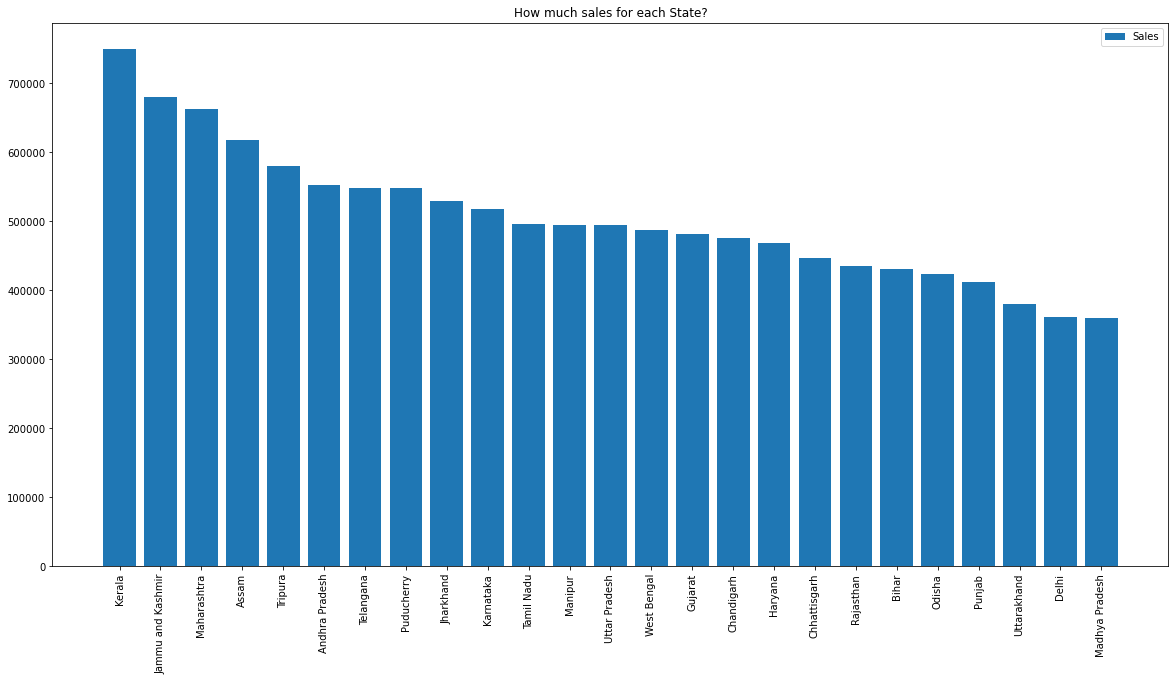

In [256]:
df6=df5.sort_values(by='Sales',ascending=False)
fig, ax = plt.subplots(figsize=(20,10))
plt.bar(height=df6.Sales,x=df6.index)
plt.legend(["Sales"])
plt.xticks(rotation=90)
plt.title("How much sales for each State?")
plt.show()

## Analysis of which state was the most profitable over time

In [257]:
df5=df.groupby(['State']).agg({'Profit':'sum'})
df5

,Profit
State,
Andhra Pradesh,67531.22696
Assam,74455.14470
Bihar,61770.60344
Chandigarh,59468.10014
Chhattisgarh,48779.31882
Delhi,40779.36750
Gujarat,65640.28670
Haryana,48121.35880
Jammu and Kashmir,60651.21048


In [258]:
df5.sort_values(by='Profit',ascending=False)

,Profit
State,
Maharashtra,90856.89788
Kerala,82549.00996
Assam,74455.14470
Karnataka,69971.62780
Andhra Pradesh,67531.22696
Gujarat,65640.28670
Jharkhand,63339.90718
West Bengal,63296.95326
Tripura,63049.10408


## Insight: Maharashtra was the most profitable followed by Kerala

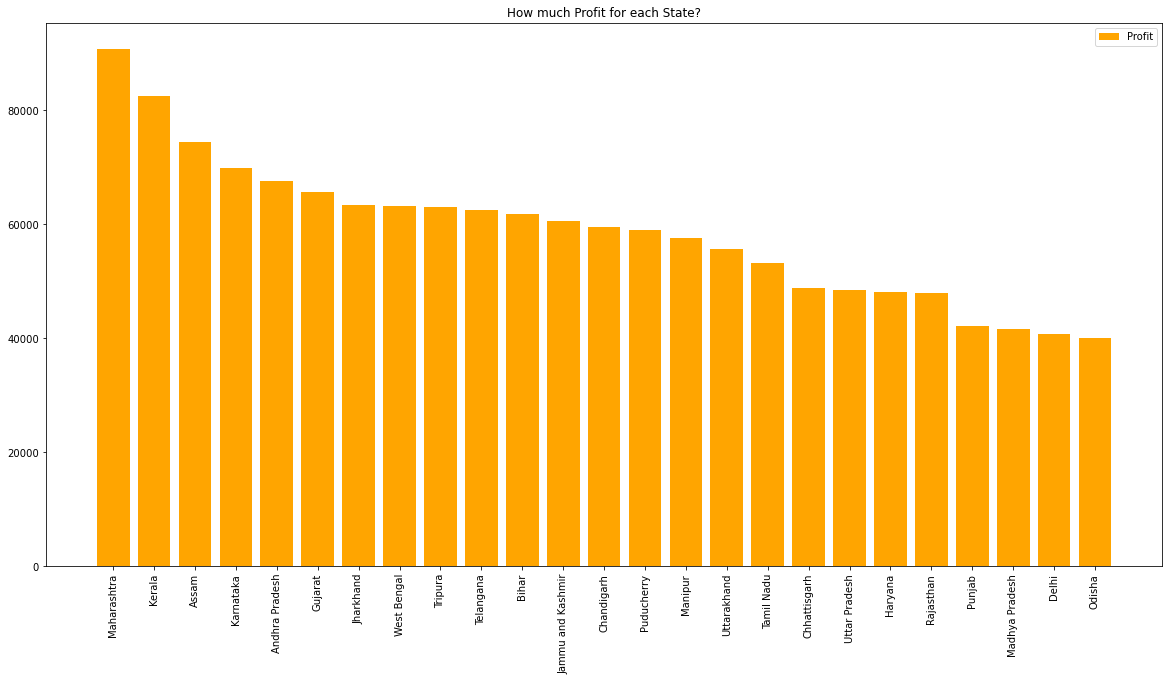

In [259]:
df6=df5.sort_values(by='Profit',ascending=False)
fig, ax = plt.subplots(figsize=(20,10))
plt.bar(height=df6.Profit,x=df6.index,color='orange')
plt.legend(["Profit"])
plt.xticks(rotation=90)
plt.title("How much Profit for each State?")
plt.show()

## Analysis of which customer segment had the maximum sales

In [270]:
df5=df.groupby(['Segment']).agg({'Sales':'sum'})
df5

,Sales
Segment,
Consumer,6.507949e+06
Corporate,3.818762e+06
Home Office,2.308453e+06


In [271]:
df5.sort_values(by='Sales',ascending=False)

,Sales
Segment,
Consumer,6.507949e+06
Corporate,3.818762e+06
Home Office,2.308453e+06


## Insight: Consumer segment had the maximum sales

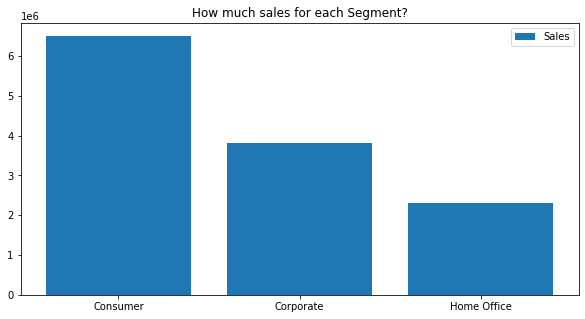

In [272]:
df6=df5.sort_values(by='Sales',ascending=False)
fig, ax = plt.subplots(figsize=(10,5))
plt.bar(height=df6.Sales,x=df6.index)
plt.title("How much sales for each Segment?")
plt.legend(["Sales"])
plt.show()

## Analysis of which customer segment made the maximum profit

In [273]:
df5=df.groupby(['Segment']).agg({'Profit':'sum'})
df5

,Profit
Segment,
Consumer,749239.78206
Corporate,441899.75646
Home Office,277833.93032


## Insight: Consumer segment made the maximum profit

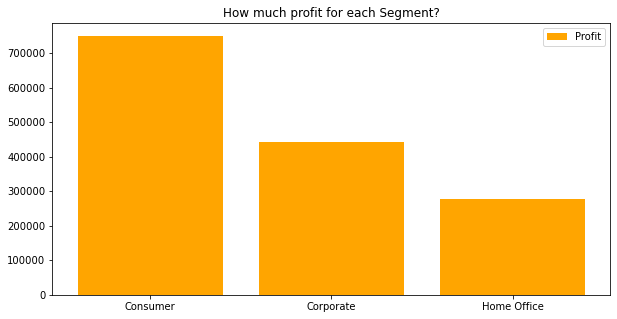

In [275]:
df6=df5.sort_values(by='Profit',ascending=False)
fig, ax = plt.subplots(figsize=(10,5))
plt.bar(height=df6.Profit,x=df6.index,color='orange')
plt.title("How much profit for each Segment?")
plt.legend(["Profit"])
plt.show()

## Analysis of which product category had the maximum sales

In [276]:
df5=df.groupby(['Category']).agg({'Sales':'sum'})
df5

,Sales
Category,
Furniture,4.108473e+06
Office Supplies,3.784875e+06
Technology,4.741818e+06


In [277]:
df5.sort_values(by='Sales',ascending=False)

,Sales
Category,
Technology,4.741818e+06
Furniture,4.108473e+06
Office Supplies,3.784875e+06


## Insight: Technology products had the maximum sales

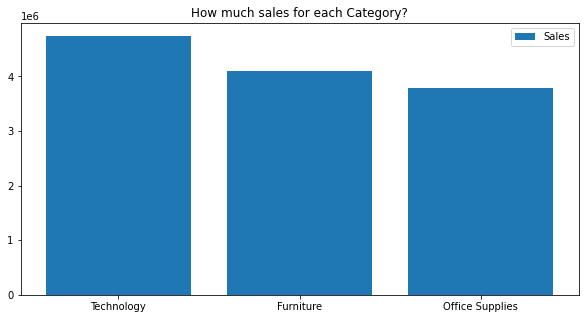

In [278]:
df6=df5.sort_values(by='Sales',ascending=False)
fig, ax = plt.subplots(figsize=(10,5))
plt.bar(height=df6.Sales,x=df6.index)
plt.title("How much sales for each Category?")
plt.legend(["Sales"])
plt.show()

## Analysis of which product category made the maximum profit

In [279]:
df5=df.groupby(['Category']).agg({'Profit':'sum'})
df5

,Profit
Category,
Furniture,285528.01860
Office Supplies,518555.16970
Technology,664890.28054


In [280]:
df5.sort_values(by='Profit',ascending=False)

,Profit
Category,
Technology,664890.28054
Office Supplies,518555.16970
Furniture,285528.01860


## Insight which Technology products made the maximum profits

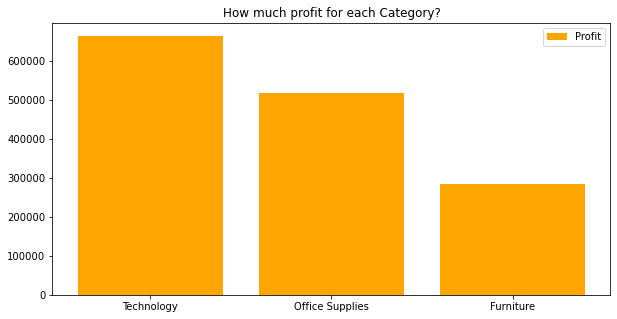

In [281]:
df6=df5.sort_values(by='Profit',ascending=False)
fig, ax = plt.subplots(figsize=(10,5))
plt.bar(height=df6.Profit,x=df6.index,color='orange')
plt.title("How much profit for each Category?")
plt.legend(["Profit"])
plt.show()

## Analysis of contribution of product sub-categories to product category sales

In [282]:
df7=df.groupby(["Category","Sub-Category"])

In [283]:
df7=df7.agg({"Sales":"sum"})
df7

Sales
Category        Sub-Category              
Furniture       Bookcases     1.466427e+06
                Chairs        1.500347e+06
                Furnishings   3.846565e+05
                Tables        7.570419e+05
Office Supplies Appliances    1.008900e+06
                Art           3.714514e+05
                Binders       4.616243e+05
                Envelopes     1.691166e+05
                Fasteners     8.947321e+04
                Labels        7.335028e+04
                Paper         2.417143e+05
                Storage       1.126468e+06
                Supplies      2.427773e+05
Technology      Accessories   7.489979e+05
                Copiers       1.507991e+06
                Machines      7.789912e+05
                Phones        1.705838e+06

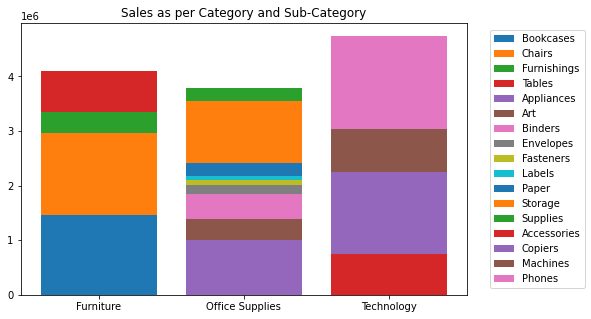

In [284]:
i=0
temp = ""
lt=[]
fig, ax = plt.subplots(figsize=(8,5))
for name in df7.index:
    if(name[0] != temp):
        temp = name[0]
        i=0
    plt.bar(height=df7.loc[name[0]].loc[name[1]].Sales,bottom=i,x=name[0])
    i=i+df7.loc[name[0]].loc[name[1]].Sales
    lt.append(name[1])

plt.legend(lt,bbox_to_anchor=(1.04,0.5),loc="center left")
plt.title("Sales as per Category and Sub-Category")
plt.show()

## Analysis of contribution of product sub-categories to product category profits

In [288]:
df7=df.groupby(["Category","Sub-Category"])

In [289]:
df7=df7.agg({"Profit":"sum"})
df7

Profit
Category        Sub-Category              
Furniture       Bookcases     161963.17950
                Chairs        140575.87150
                Furnishings    47072.35630
                Tables        -64083.38870
Office Supplies Appliances    141423.97650
                Art            57808.39230
                Binders        72571.61160
                Envelopes      28810.18730
                Fasteners      13847.56890
                Labels         14988.92370
                Paper          58137.09350
                Storage       108411.22060
                Supplies       22556.19530
Technology      Accessories   129718.55020
                Copiers       259664.59954
                Machines       58905.78100
                Phones        216601.34980

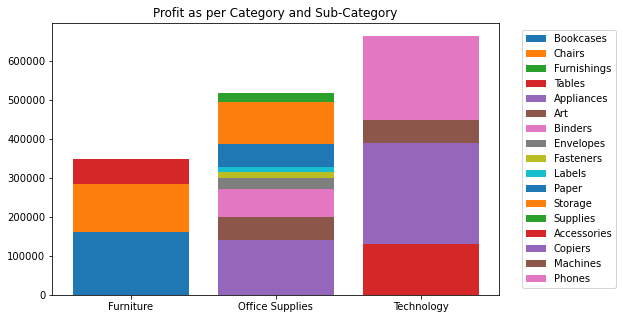

In [290]:
i=0
temp = ""
lt=[]
fig, ax = plt.subplots(figsize=(8,5))
for name in df7.index:
    if(name[0] != temp):
        temp = name[0]
        i=0
    plt.bar(height=df7.loc[name[0]].loc[name[1]].Profit,bottom=i,x=name[0])
    i=i+df7.loc[name[0]].loc[name[1]].Profit
    lt.append(name[1])

plt.legend(lt,bbox_to_anchor=(1.04,0.5),loc="center left")
plt.title("Profit as per Category and Sub-Category")
plt.show()

## Analysis of which product sub-categories sold in which state made the maximum profits. Insight: Copiers sold in Tripura made maximum profits whereas Tables sold in Karnataka made the most losses.

In [325]:
df4 = df.groupby(["Sub-Category","State"]).agg({"Profit":"sum"})
df4.sort_values("Profit",ascending=False)

Profit
Sub-Category State                     
Copiers      Tripura        19161.78338
Phones       Maharashtra    18279.53390
Copiers      Kerala         17997.76356
Phones       Telangana      15835.52240
             West Bengal    15677.36390
...                                 ...
Tables       Uttar Pradesh  -4446.31880
             Haryana        -4498.62400
             Chhattisgarh   -4818.41360
             Odisha         -5400.26760
             Karnataka      -5712.70680

[425 rows x 1 columns]

## Analysis of which customer buying which category of products made the most profits. Insight: Tamara Chand buying Technology products made the most profits wheras Cindy Stewart buying Technology products made the most losses

In [326]:
df4 = df.groupby(["Customer_Name","Category"]).agg({"Sales":"sum","Profit":"sum"})
df4.sort_values("Profit",ascending=False)

,,Sales,Profit
Customer_Name,Category,,
Tamara Chand,Technology,24109.32100,9124.78700
Raymond Buch,Technology,18533.37560,7639.30690
Hunter Lopez,Technology,21388.01668,6980.21888
Sanjit Chand,Office Supplies,15715.18800,6394.60270
Tom Ashbrook,Technology,20799.68080,6166.41950
...,...,...,...
Henry Goldwyn,Office Supplies,7525.70000,-3341.31310
Grant Thornton,Technology,11900.76384,-3594.64656
Luke Foster,Office Supplies,5539.21650,-3703.01520


## Analysis of Trend and Seasonality components of sales 

In [311]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [312]:
df5 = df[["Ship_Date","Sales"]]

In [313]:
df5

,Ship_Date,Sales
0,2012-01-06,408.300
1,2012-01-08,120.366
2,2012-01-05,66.120
3,2012-01-05,44.865
4,2012-01-08,113.670
...,...,...
51285,2016-01-05,3.990
51286,2016-01-07,79.470
51287,2016-01-02,26.400
51288,2016-01-04,16.740


In [314]:
df5 = df5.groupby('Ship_Date').agg({'Sales':'sum'})
df5

,Sales
Ship_Date,
2012-01-03,311.98500
2012-01-05,110.98500
2012-01-06,722.52000
2012-01-07,2878.66600
2012-01-08,1794.69220
...,...
2016-01-03,10274.76090
2016-01-04,9346.72358
2016-01-05,4031.09000


## Graph of sales over time

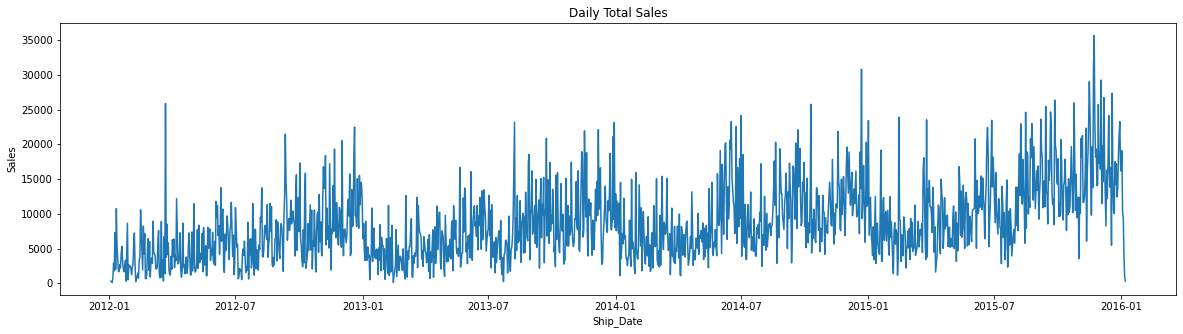

In [327]:
fig,ax=plt.subplots(figsize=(20,5))
sn.lineplot(data=df5,y=df5.Sales,x=df5.index)
plt.title("Daily Total Sales")
plt.show()

In [316]:
sd = seasonal_decompose(df5, period=12)
df5['observed'] = sd.observed
df5['residual'] = sd.resid
df5['seasonal'] = sd.seasonal
df5['trend'] = sd.trend

In [317]:
df5

,Sales,observed,residual,seasonal,trend
Ship_Date,,,,,
2012-01-03,311.98500,311.98500,NaN,-603.287177,NaN
2012-01-05,110.98500,110.98500,NaN,-196.739172,NaN
2012-01-06,722.52000,722.52000,NaN,110.720909,NaN
2012-01-07,2878.66600,2878.66600,NaN,-308.439287,NaN
2012-01-08,1794.69220,1794.69220,NaN,7.801851,NaN
...,...,...,...,...,...
2016-01-03,10274.76090,10274.76090,NaN,-170.606006,NaN
2016-01-04,9346.72358,9346.72358,NaN,380.533905,NaN
2016-01-05,4031.09000,4031.09000,NaN,313.595052,NaN


## Graph showing sales trend over time

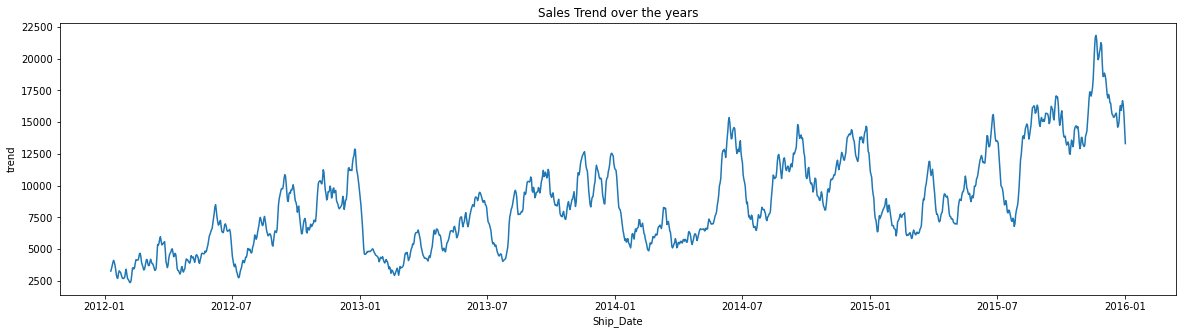

In [318]:
fig,ax=plt.subplots(figsize=(20,5))
sn.lineplot(data=df5,y=df5.trend,x=df5.index)
plt.title("Sales Trend over the years")
plt.show()

## Graph showing sales seasonality over time

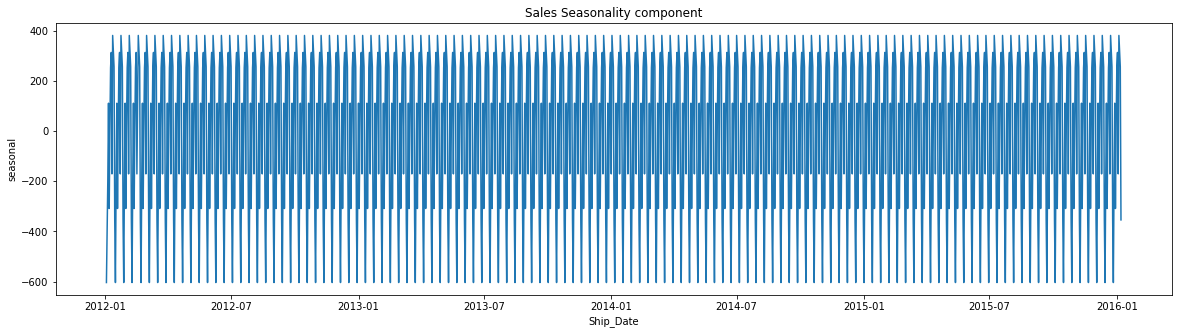

In [319]:
fig,ax=plt.subplots(figsize=(20,5))
sn.lineplot(data=df5,y=df5.seasonal,x=df5.index)
plt.title("Sales Seasonality component")
plt.show()

## Graph showing sales residual component over time

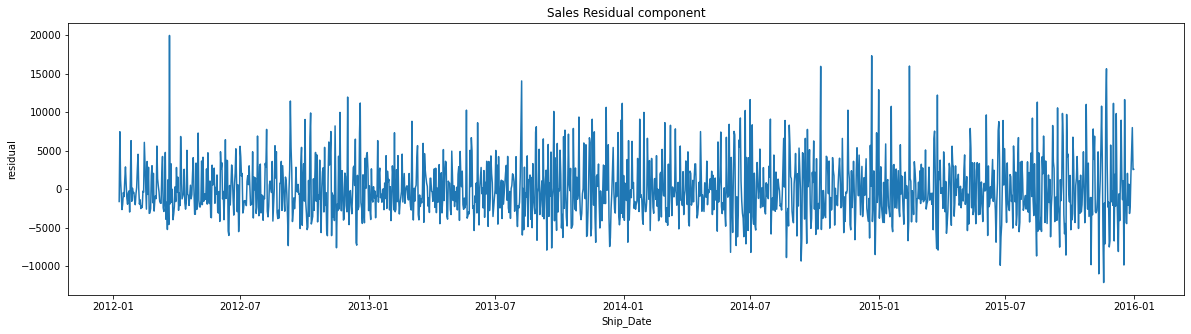

In [320]:
fig,ax=plt.subplots(figsize=(20,5))
sn.lineplot(data=df5,y=df5.residual,x=df5.index)
plt.title("Sales Residual component")
plt.show()